<a href="https://colab.research.google.com/github/haadirazzak/sales_predictions/blob/main/Sales_Predictions_Pt5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
filename = '/content/drive/My Drive/sales_predictions (1).csv'
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.shape

(8523, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.isnull().sum() 


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [12]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df.replace(to_replace= "LF", value="Low Fat")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
df.replace(to_replace= "low fat", value="Low Fat")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [16]:
column = df['Item_Outlet_Sales']
max_value = column.max()
print(max_value)

13086.9648


In [17]:
column = df['Item_Outlet_Sales']
min_value = column.min()
print(min_value)

33.29


In [18]:
column = df['Item_Outlet_Sales']
mean_value = column.mean()
print(mean_value)

2181.2889135750365


In [19]:
column = df['Item_MRP']
min_value = column.min()
print(min_value)

31.29


In [20]:
column = df['Item_MRP']
max_value = column.max()
print(max_value)

266.8884


In [21]:
column = df['Item_MRP']
mean_value = column.min()
print(mean_value)

31.29


In [22]:
df['Item_MRP']

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

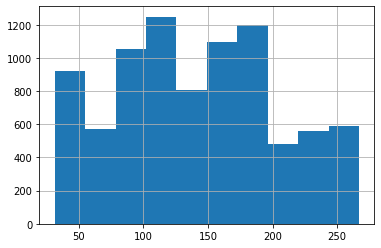

In [23]:
df['Item_MRP'].hist()

In [24]:
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

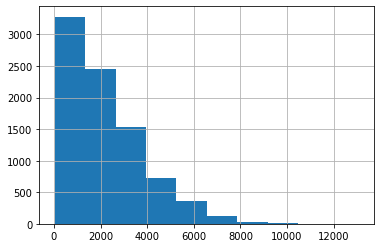

In [25]:
df['Item_Outlet_Sales'].hist()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

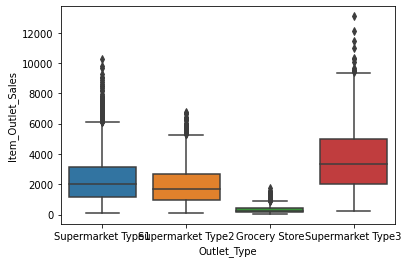

In [27]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

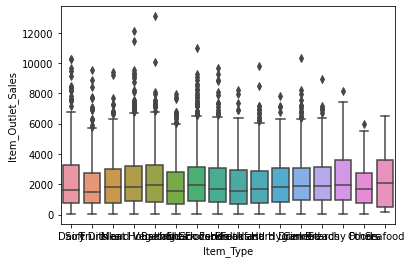

In [28]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)


In [29]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


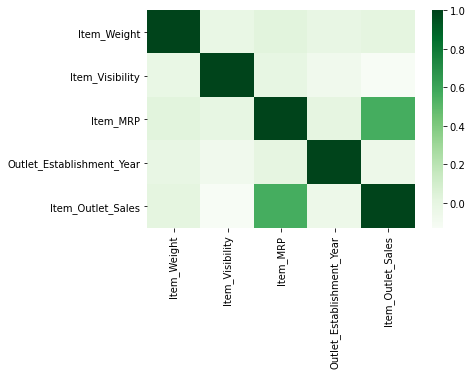

In [30]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

In [31]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [32]:
df[df['Item_Outlet_Sales']==df['Item_Outlet_Sales'].max()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [33]:
df[df['Item_Outlet_Sales']==df['Item_Outlet_Sales'].min()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500,Low Fat,0.000000,Soft Drinks,32.89,OUT010,1998,NaN,Tier 3,Grocery Store,33.29
6950,NCR42,9.105,Low Fat,0.064411,Household,33.39,OUT010,1998,NaN,Tier 3,Grocery Store,33.29


In [34]:
group = df.groupby(["Outlet_Type","Item_Type"]).sum()
total_price = group["Item_Outlet_Sales"].groupby(level=0, group_keys=False)
total_price.nlargest(5)

Outlet_Type        Item_Type            
Grocery Store      Snack Foods              5.159617e+04
                   Fruits and Vegetables    4.860207e+04
                   Household                4.370711e+04
                   Frozen Foods             3.319546e+04
                   Dairy                    3.145173e+04
Supermarket Type1  Fruits and Vegetables    1.931958e+06
                   Snack Foods              1.889387e+06
                   Household                1.437220e+06
                   Frozen Foods             1.292668e+06
                   Dairy                    1.076694e+06
Supermarket Type2  Snack Foods              2.787145e+05
                   Fruits and Vegetables    2.634717e+05
                   Household                1.962672e+05
                   Frozen Foods             1.835990e+05
                   Dairy                    1.521306e+05
Supermarket Type3  Fruits and Vegetables    5.760282e+05
                   Snack Foods              5.1

In [35]:
df.groupby(["Item_Type"]).sum().sort_values("Item_Outlet_Sales", ascending=False)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Fruits and Vegetables,13476.040,84.407946,178124.0810,2461191,2.820060e+06
Snack Foods,12832.025,80.220267,175433.9204,2397464,2.732786e+06
Household,10159.015,55.803305,135976.5254,1817984,2.055494e+06
Frozen Foods,9238.550,56.192325,118558.8814,1710309,1.825735e+06
Dairy,7599.155,49.395349,101276.4596,1362419,1.522594e+06
Canned,6632.775,44.215926,90706.7270,1296801,1.444151e+06
Baking Goods,6580.530,44.821706,81894.7364,1294528,1.265525e+06
Health and Hygiene,5651.195,28.712309,68025.8388,1038822,1.045200e+06
Meat,4319.445,26.470620,59449.8638,848870,9.175656e+05


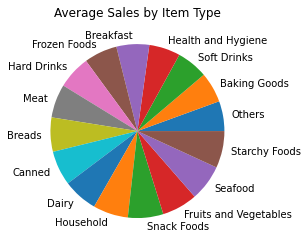

In [36]:
df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values().plot(kind="pie")
plt.ylabel("")
plt.title('Average Sales by Item Type');

Text(0, 0.5, 'Average Sales $')

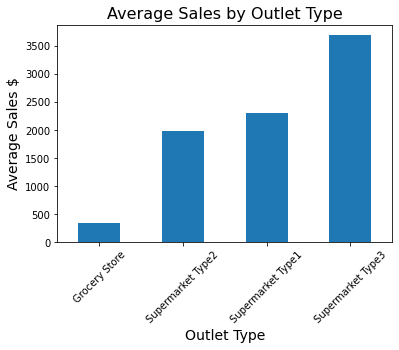

In [37]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values().plot(kind="bar")
plt.title('Average Sales by Outlet Type', fontsize = 16);
plt.xticks(rotation = 45)
plt.xlabel('Outlet Type', fontsize = 14)
plt.ylabel('Average Sales $', fontsize = 14)

In [73]:
y = df['Item_Outlet_Sales']
df_drop =df.drop(columns=['Item_Outlet_Sales', 	'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type', 'Item_Visibility'], axis = 1)
X = np.array(df_drop)

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as npcopy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as npcopy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [75]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

ValueError: ignored

In [69]:
reg = LinearRegression()

In [70]:
reg.fit(X_train,y_train)

ValueError: ignored

In [71]:
train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

NotFittedError: ignored

In [72]:
train_score = reg.score(X_train, y_train)
print(train_score)

NotFittedError: ignored

In [ ]:
test_score = reg.score(X_test, y_test)
print(test_score)

In [ ]:
from sklearn.metrics import mean_squared_error
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))